In [128]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import RFE
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report

## Car-Price


In [98]:
dados=pd.read_csv(r"C:/Users/AnaLúciaLima/Downloads/car_price.csv")
dados.head(6)

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg,price
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,5000,21,27,13495.0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,5000,21,27,16500.0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,154,5000,19,26,16500.0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,102,5500,24,30,13950.0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,115,5500,18,22,17450.0
5,6,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,110,5500,19,25,15250.0


In [99]:
df.shape

(205, 14)

In [100]:
df.describe(percentiles = [0.10,0.25,0.50,0.75,0.90,0.99])

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,48.000000,4150.000000,13.000000,16.000000,5118.000000
10%,21.400000,93.700000,157.300000,63.800000,50.600000,1947.000000,91.000000,2.970000,2.882000,68.000000,4500.000000,17.000000,23.000000,6657.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,116.000000,5500.000000,30.000000,34.000000,16503.000000
90%,184.600000,107.900000,188.800000,68.640000,56.620000,3230.000000,181.000000,3.672000,3.540000,160.000000,5780.000000,31.600000,38.000000,22563.000000
99%,202.960000,115.544000,202.480000,71.700000,59.100000,3948.000000,302.160000,3.800000,3.900000,207.000000,6000.000000,44.720000,49.880000,40802.720000


<AxesSubplot:>

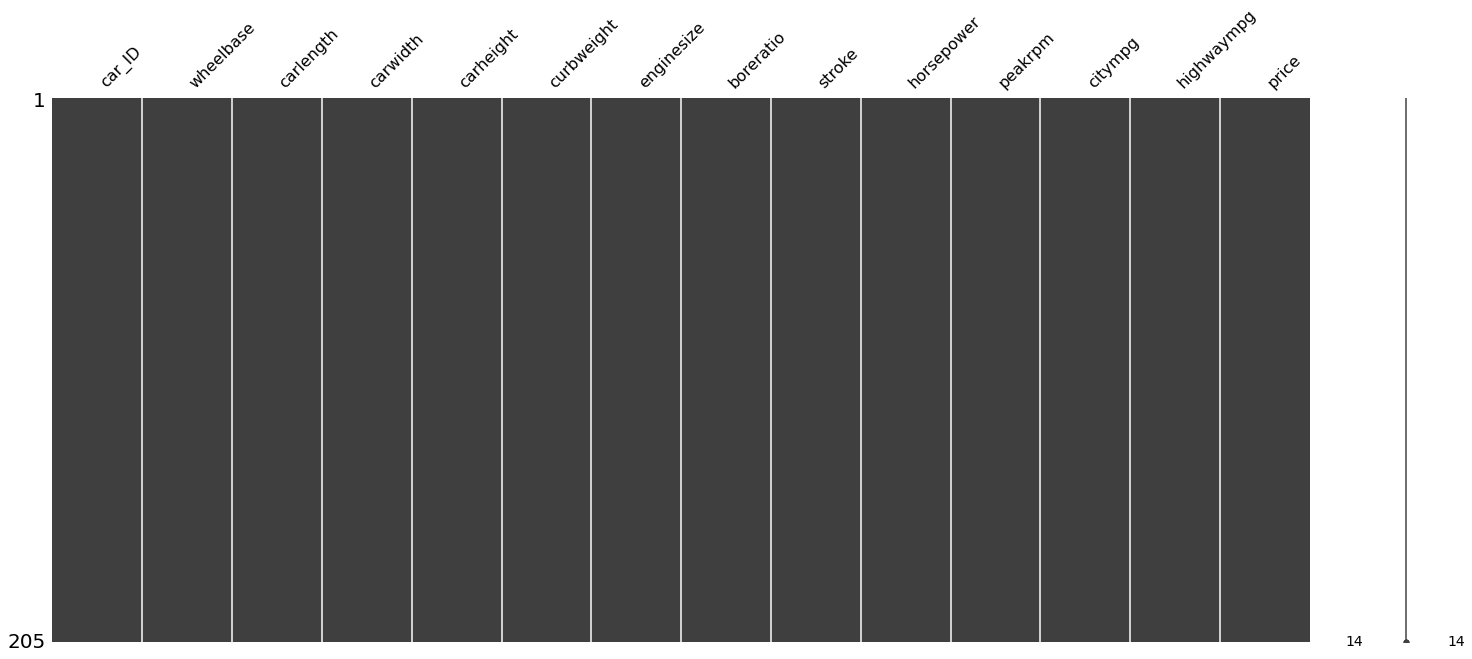

In [101]:
import missingno as msno
msno.matrix(df)

In [102]:
df = pd.DataFrame(dados)
print(df)

     car_ID  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1       88.6      168.8      64.1       48.8        2548   
1         2       88.6      168.8      64.1       48.8        2548   
2         3       94.5      171.2      65.5       52.4        2823   
3         4       99.8      176.6      66.2       54.3        2337   
4         5       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...       ...        ...         ...   
200     201      109.1      188.8      68.9       55.5        2952   
201     202      109.1      188.8      68.8       55.5        3049   
202     203      109.1      188.8      68.9       55.5        3012   
203     204      109.1      188.8      68.9       55.5        3217   
204     205      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  horsepower  peakrpm  citympg  highwaympg  \
0           130       3.47    2.68         111     5000       21          27   

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   car_ID      205 non-null    int64  
 1   wheelbase   205 non-null    float64
 2   carlength   205 non-null    float64
 3   carwidth    205 non-null    float64
 4   carheight   205 non-null    float64
 5   curbweight  205 non-null    int64  
 6   enginesize  205 non-null    int64  
 7   boreratio   205 non-null    float64
 8   stroke      205 non-null    float64
 9   horsepower  205 non-null    int64  
 10  peakrpm     205 non-null    int64  
 11  citympg     205 non-null    int64  
 12  highwaympg  205 non-null    int64  
 13  price       205 non-null    float64
dtypes: float64(7), int64(7)
memory usage: 22.5 KB


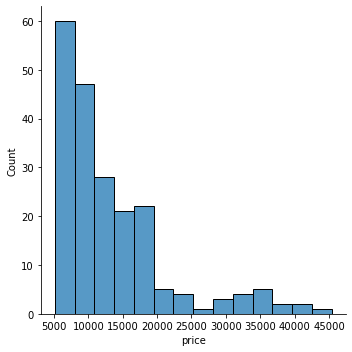

In [104]:
sns.displot(df.price)

29575.5
-5284.5


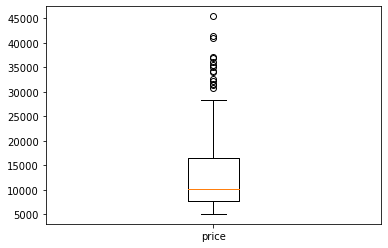

In [105]:
#Outliers é um dado que se encontra fora do padrão global de uma distribuíção 
#O calculo do IQR x 1.5 é feito para excluir qulquer ruído de dados 

df["price"].astype(float)
Q1 = df['price'].quantile(q=0.25)
Q3 = df['price'].quantile(q=0.75)

IQR=Q3-Q1 #mediana
filtered = df.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')
df.join(filtered, rsuffix='filtered')
plt.boxplot(df['price'], labels=['price']);

#Para visualizar com precisão os valores do limite superior e do limite inferior 
#utilizei a constante de 1.5 pois é o valor comumente usado
print(Q3+1.5*IQR)
print(Q1-1.5*IQR)

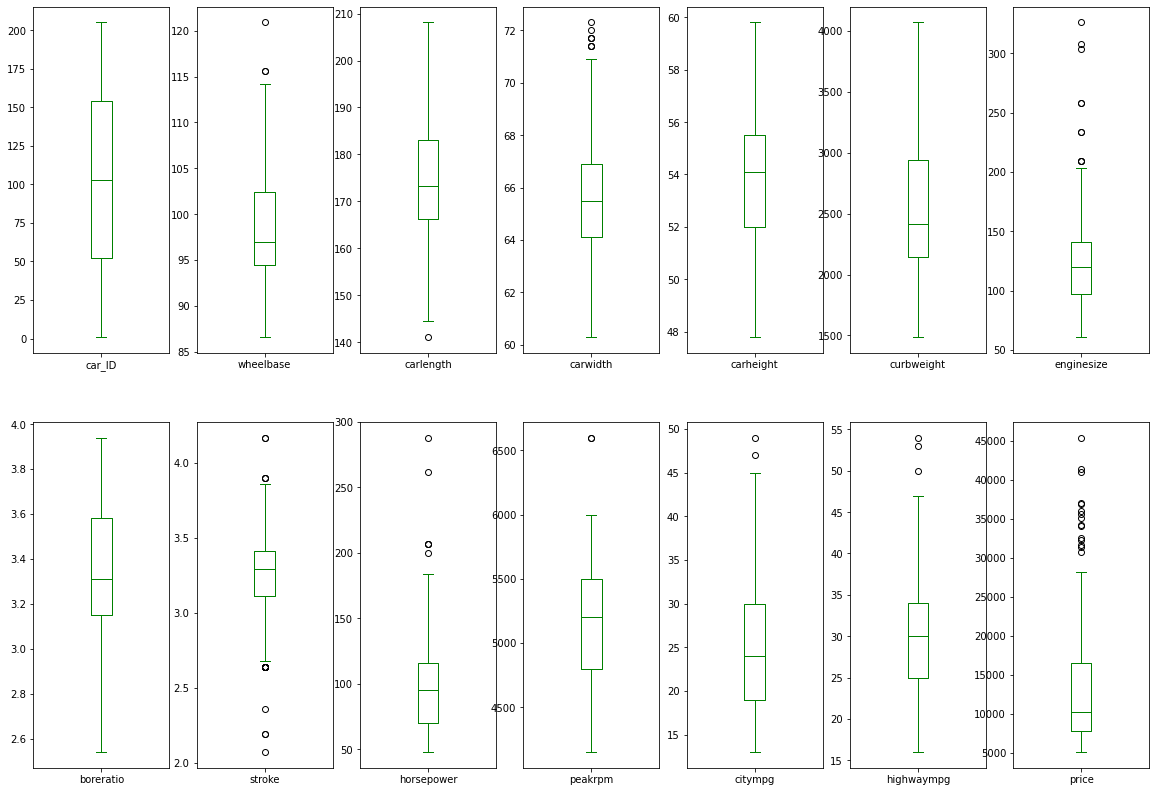

In [106]:
df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 14),
color='green');

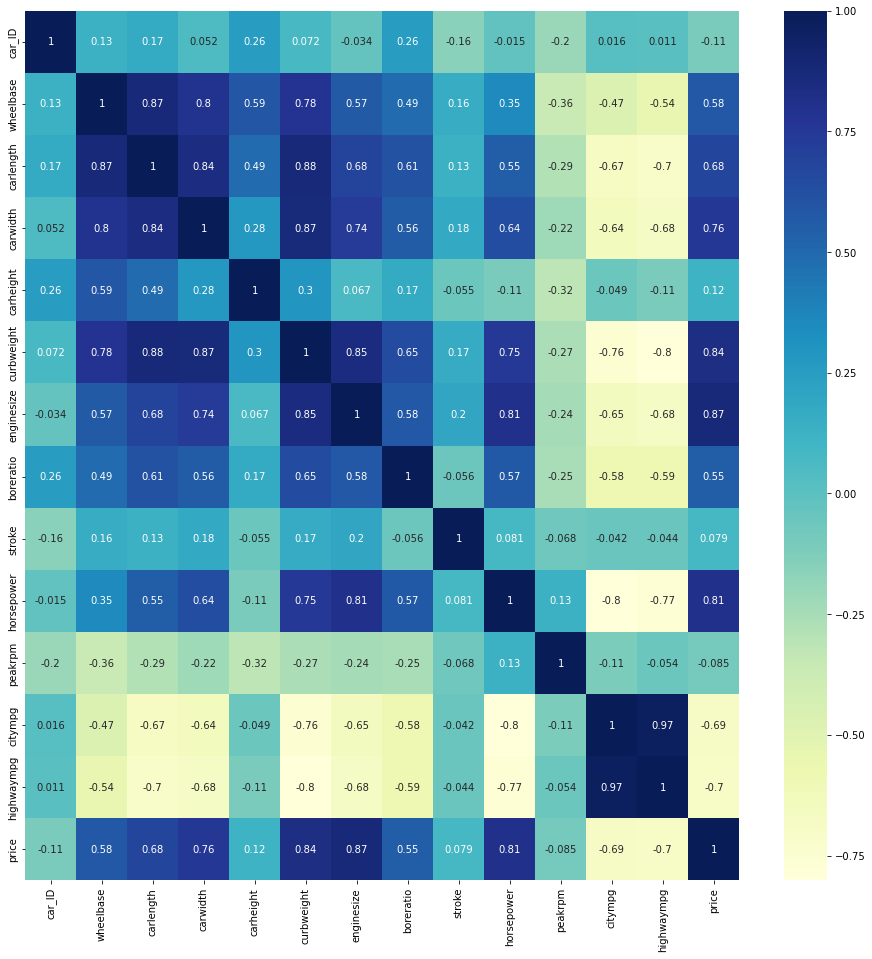

In [114]:
plt.figure(figsize = (16,16))
sns.heatmap(df.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()


In [109]:
X = df[["wheelbase","carlength","carwidth","carheight","enginesize","horsepower", "boreratio"]] 
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=44)

In [110]:
scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
print('RMSE (Treino)', np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('RMSE (Teste)', np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))


RMSE (Treino) 3264.9608023556825
RMSE (Teste) 3923.3680541509702


In [120]:
# previsões
y_pred = lr.predict(X_train)

# Results
r2 = r2_score(y_train, y_pred)
print("O R2 do regressor é:", r2)

O R2 do regressor é: 0.8288480681217378


In [121]:
# previsões
y_pred = lr.predict(X_test)

# Results
r2 = r2_score(y_test, y_pred)
print("O R2 do regressor é:", r2)


O R2 do regressor é: 0.7749152947151325
